<a href="https://colab.research.google.com/github/ITlearning/Practice_Machine_Learning/blob/main/03_29/BreamAndSmelt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

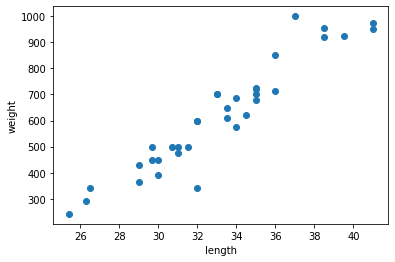

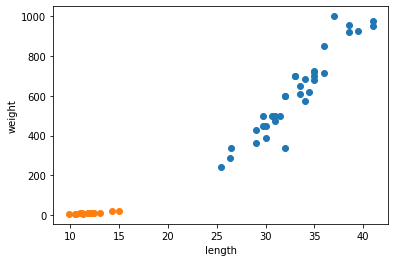

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


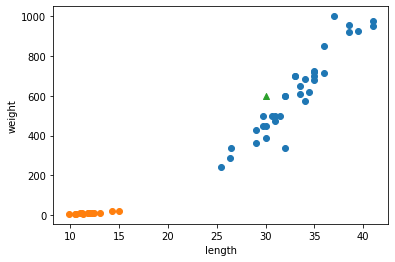

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]
0.7142857142857143


In [6]:
# 마켓과 머신러닝

# 생성 분류 문제

# 도미 데이터 준비하기

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

import matplotlib.pyplot as plt # matplotlib의 pylot 함수를 plt 로 줄여서 사용

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')            # x축은 길이
plt.ylabel('weight')            # y축은 무게
plt.show()

# 빙어 데이터 준비하기
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 첫 번째 머신러닝 프로그램

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l,w] for l,w in zip(length, weight)] # 리스트 내포를 이용한 fish_data 2차원 리스트 제작. 사이킷런을 사용하기 위해선 2차원 리스트로 구현해야 됨.

print(fish_data)

fish_target = [1] * 35 + [0] * 14 # 도미와 빙어를 구분해주는 target. 1일 경우 도미, 0일 경우 빙어를 나타냄.

from sklearn.neighbors import KNeighborsClassifier # 사이킷런 패키지에서 k-최근접 이웃 알고리즘을 구현한 클래스

kn = KNeighborsClassifier()

kn.fit(fish_data, fish_target) # fit() 메소드는 학습시키는 역할을 한다.

kn.score(fish_data, fish_target) # 훈련이 얼마나 잘 됐는지를 평가하는 score() 메소드. 0부터 1까지 출력된다. 1이면 완벽하게 학습된것이고, 0.5면 절반.

# k-최근접 이웃 알고리즘

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30,600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kn.predict([[30,600]])     # predict() 메소드는 새로운 데이터의 정답을 예측한다. 
# k-최근접 이웃 알고리즘은, 어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 한다.
# 위 30,600의 데이터는 주위에 도미 데이터가 많으므로 이 데이터를 도미라고 판단할 것이다. 따라서 1이 출력됐다.


print(kn._fit_X)
print(kn._y)

kn49 = KNeighborsClassifier(n_neighbors=49) # 보통 k-최근접 이웃 알고리즘은 주변에서 가장 가까운 5개의 데이터를 가지고 비교를 진행한다. 하지만 이 코드에선 5개로 비교하는 수를 49개. 모든 개수를 이용하여 비교한다는 의미이다.

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)  # fish_data 의 데이터 49개 중 도미가 35개 로 다수를 차지하므로, 어떤 데이터를 넣어도 무조건 도미로 예측할 것이다.

print(35/49)                        # 출력되는 수가 49개로 설정해놓고 데이터를 예측 할 수 있는 정확도이다.